In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('salary_data.csv', delimiter='\t')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
# Split into features and target
X = df[['YearsExperience']]
Y = df['Salary']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

In [9]:
# Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


In [11]:
# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 49830096.86
R² Score: 0.90


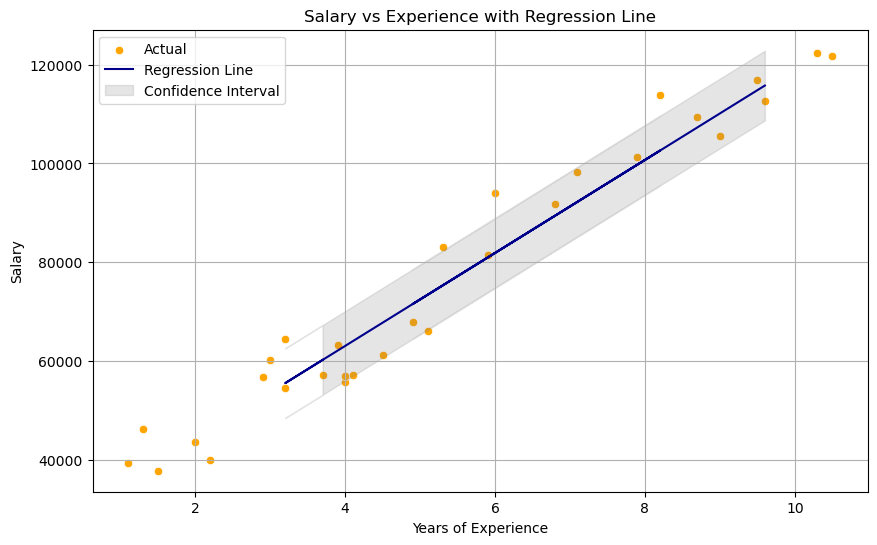

In [13]:
# Visualizing plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Actual', color ="orange")
plt.plot(X_test, Y_pred, color="darkblue", label='Regression Line')
plt.fill_between(X_test.squeeze(), Y_pred - mse**0.5, Y_pred + mse**0.5, color='gray', alpha=0.2, label='Confidence Interval')
plt.title("Salary vs Experience with Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

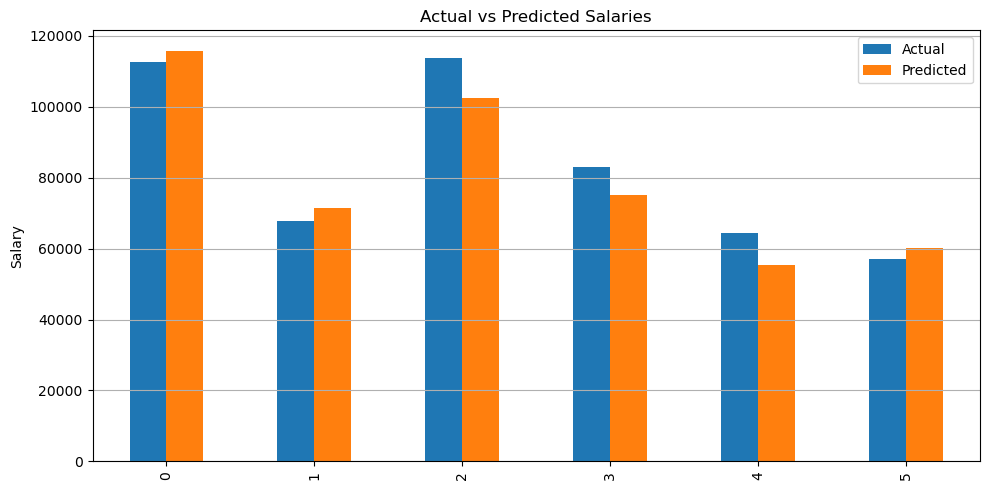

In [19]:
# Compare predictions vs actual
compare_df = pd.DataFrame({'Actual': Y_test.values, 'Predicted': Y_pred})
compare_df.plot(kind='bar', figsize=(10,5))
plt.title('Actual vs Predicted Salaries')
plt.ylabel('Salary')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
# User input prediction
experience = float(input("Enter years of experience to predict salary: "))
predicted_salary = model.predict([[experience]])
print(f"Predicted Salary for {experience} years of experience is ₹{predicted_salary[0]:.2f}")


Enter years of experience to predict salary:  9


Predicted Salary for 9.0 years of experience is ₹110135.92


C:\Users\family\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
